In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import cluster, datasets, mixture
from sklearn.decomposition import PCA, KernelPCA
import itertools

In [2]:
data_new = pd.read_csv('raw_new.csv', sep=',',engine='python')
x = data_new[['INSUL','TAAV','RH','dayav_ta','dayav_rh']]
# raw y without rounding 
y = data_new[['ASH']]
y = y.round()
tmax = x['TAAV'].max()
tmin = x['TAAV'].min()

In [3]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 5)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(x)
        bic.append(gmm.bic(x))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            best_n = n_components
            best_cov = cv_type

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
best_n

4

In [4]:
gmm = mixture.GaussianMixture(n_components=4, covariance_type='diag')

In [5]:
train = gmm.fit(x)
cluster = gmm.predict(x)
np.unique(cluster)

array([0, 1, 2, 3])

In [6]:
# get the features of each cluster
index0, = np.where(cluster == 0)
index1, = np.where(cluster == 1)
index2, = np.where(cluster == 2)
index3, = np.where(cluster == 3)
x0 = x.iloc[index0.tolist()]
x1 = x.iloc[index1.tolist()]
x2 = x.iloc[index2.tolist()]
x3 = x.iloc[index3.tolist()]
# get the sensation of each cluster
y0 = y.iloc[index0.tolist()]
y1 = y.iloc[index1.tolist()]
y2 = y.iloc[index2.tolist()]
y3 = y.iloc[index3.tolist()]

In [7]:
print('INSUL','TAAV','RH','dayav_ta','dayav_rh')
gmm.means_

INSUL TAAV RH dayav_ta dayav_rh


array([[  0.72030697,  23.67717552,  56.87546085,  21.32193348,
         73.18134688],
       [  0.83867114,  22.56678174,  36.35818622,  10.5276385 ,  74.6602181 ],
       [  0.69549111,  25.19709864,  61.13574267,  27.71474596,
         81.37292304],
       [  0.76932564,  22.63416514,  57.23829189,  21.71928631,  52.1632487 ]])

In [8]:
gmm.covariances_

array([[  2.38922271e-02,   1.39117906e+00,   6.37409007e+01,
          1.10740181e+01,   5.42081959e+01],
       [  3.99383936e-02,   1.15803043e+00,   6.28312495e+01,
          1.76064407e+01,   2.68482254e+01],
       [  1.50498891e-02,   5.30829498e+00,   5.01209065e+01,
          5.33702244e-02,   6.60370785e-02],
       [  3.71037817e-02,   4.81228465e-01,   2.88683136e+01,
          1.34349540e+01,   4.37232498e+00]])

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools

In [10]:
import seaborn as sns

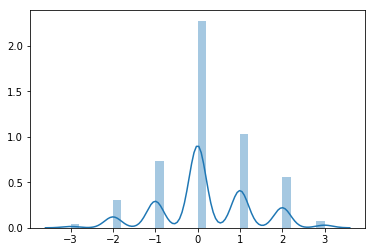

In [11]:
sns.distplot(y0)

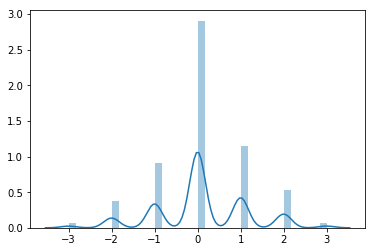

In [12]:
sns.distplot(y1)

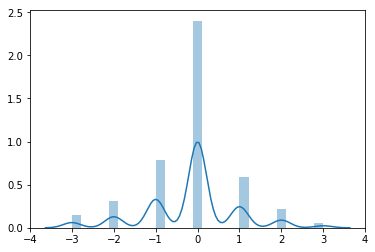

In [13]:
sns.distplot(y2)

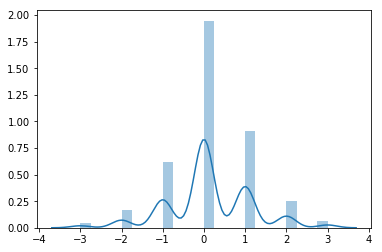

In [14]:
sns.distplot(y3)

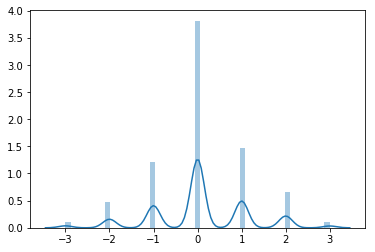

In [15]:
sns.distplot(y)

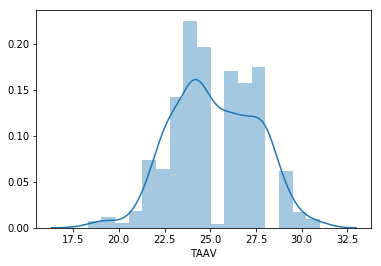

In [16]:
sns.distplot(x2['TAAV'])

In [17]:
x_new = x[['TAAV','RH','INSUL']]

In [18]:
lili_new = pd.read_csv('lili_feature.csv', sep=',',engine='python')

In [19]:
lili = lili_new[['temperature','humidity','clo','sensation']]
lili_y = lili['sensation']
lili_x = lili[['temperature','humidity','clo']]

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [21]:
x= x2[['TAAV','RH','INSUL']]
y = y2['ASH']
best = 0
for i in range(30):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    score = cross_val_score(knn, x, y, cv=5).mean()
    if score > best:
        best = score
    best_k = i+1
    
best_k
best
# best k could be 30 but it seems the larger the k is, the better

0.52534904761960222

In [22]:
knn.fit(x, y) 
# test with experimental data
predicted = knn.predict(lili_x)
metrics.accuracy_score(lili_y, predicted)
# evaluation with rp884
predicted = cross_val_predict(knn, x, y, cv=5)
metrics.accuracy_score(y, predicted) 

0.51820728291316531